<center><h1 style="font-size:2em;color:#2467C0;">Lernkontrolle 03.08.23 </h1></center>

# Aufgabe 1 - GIT

Wie bereits im Github Repository der Lernkontrolle beschrieben, bearbeite dieses Jupyter Notebook innerhalb eines Repos, welches ein "Fork" des AUfgaben-Repositories ist.

Wenn du ferti mit den Aufgaben in diesem Notebook bist, zeichne alle deine Änderungen in einem commit auf, und lade deine neue Version wieder auf deinem Remote Repository hoch.

Füge hier den Link zu deinem Github Repository ein, in welchem deine Lösung hinterlegt ist. (10p)

In [ ]:
# Link zum Github Repo mit deiner Lösung:
# 

# Aufgabe 2 - Pandas und Diagramme

**a)** Lade den im Github Repository bereitgestellten Datensatz `"data.csv"` in ein DataFrame. Wenn du das Repository geklont hast und diesen Ordner in VSCode geöffnet hast, sollte der Datensatz bereits im Arbeitsverzeichnis liegen. Lass dir die ersten 5 Zeilen des DataFrames ausgeben. (2p)

In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\User\Downloads\data.csv")
print(df.head())

   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  


**b)** Wir wollen wissen, um was für Daten es sich handelt. Finde heraus wie viele Variablen (Spalten) und wie viele Beobachtungen (Zeilen) es gibt. Finde auch heraus, ob es irgendwo fehlende Werte gibt. (6p).

In [2]:
num_columns = len(df.columns)
print(f"Anzahl der Variablen (Spalten): {num_columns}")

num_rows = len(df)
print(f"Anzahl der Beobachtungen (Zeilen): {num_rows}")

missing_values = df.isnull().sum()
print("Fehlende Werte:")
print(missing_values)


Anzahl der Variablen (Spalten): 9
Anzahl der Beobachtungen (Zeilen): 4710
Fehlende Werte:
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


**c)** Lasse dir den durchschnittlichen Umsatz (`Sales`) pro Wochentag (`DayOfWeek`) in einem Balkendiagramm darstellen. Versehe es mit Achsenbeschriftungen und einem Diagrammtitel (6p).

Beispiel: (Muss nicht exakt gleich aussehen)

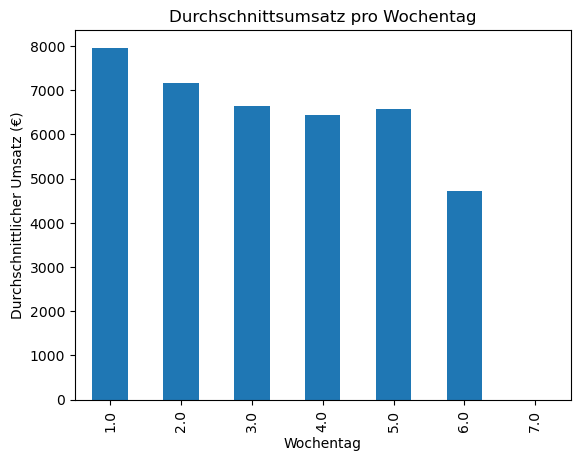

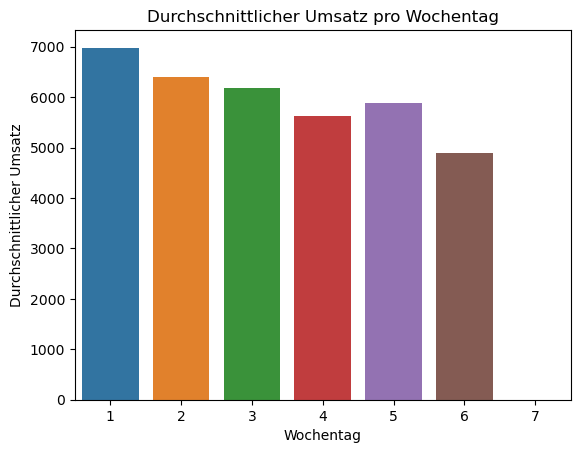

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

average_sales_per_day = df.groupby("DayOfWeek")["Sales"].mean()
sns.barplot(x=average_sales_per_day.index, y=average_sales_per_day.values)
plt.xlabel("Wochentag")
plt.ylabel("Durchschnittlicher Umsatz")
plt.title("Durchschnittlicher Umsatz pro Wochentag")
plt.show()

**d)** Stelle nun den durchschnittlichen Umsatz pro Geschäft (`"Store"`) als Kreisdiagramm dar und wende für die Tortenstücke eine anderes Farbschema an, als das Standard Schema. Versehe auch dieses Diagramm mit einem Titel. (8p)

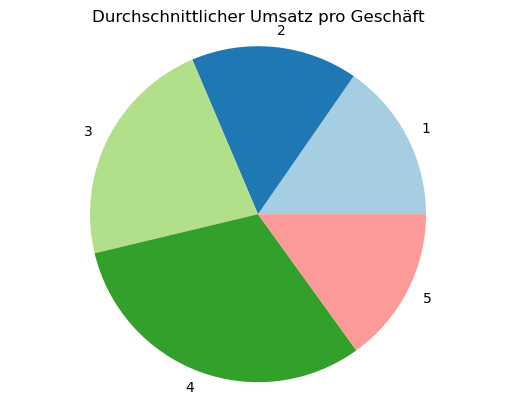

In [4]:
average_sales_per_store = df.groupby("Store")["Sales"].mean()

plt.pie(average_sales_per_store, labels=average_sales_per_store.index, colors=plt.cm.Paired.colors)
plt.axis("equal")
plt.title("Durchschnittlicher Umsatz pro Geschäft")
plt.show()

# Aufgabe 2 - Widgets

**a)** Erstelle eine Funktion, welche einen Preis, eine Stückzahl und einen Mehrwertsteuersatz als Argumente annimmt. Der Mehrwertsteuersatz soll standardmäßig den Wert `0.17` bekommen. Die Funktion soll dann sowohl den Brutto-Gesamtpreis als auch den Netto-Gesamtpreis (nach Steuer-Abzug), und auch den Betrag der Mehrwertsteuer als 3-Werte Tupel zurückgeben.

Mache die Funktion anschließend interaktiv, sodass man die Stückzahl und den Preis (z.B. per Slider) einstellen kann. Es sollten Preise von 0 bis 100 € in 5 Cent Schritten darstellbar sein, sowie Anzahlen von 1 bis 100 (ohne Kommastellen). (8p)

2 Bonuspunkte: Verwende für den Mehrwertsteuersatz ein anderes Widget, bei dem man die Zahl direkt als Text in ein Feld eingeben kann (Schaue dafür in der Dokumentation von ipywidgets, welches in Frage kommen könnte).

2 Bonuspunkte: Printe zusätzlich zum Rückgabewert der Funktion einen schönen Format-String, der die einzelnen Werte anzeigt, die berechnet wurden (siehe Beispiel).

Beispiel:

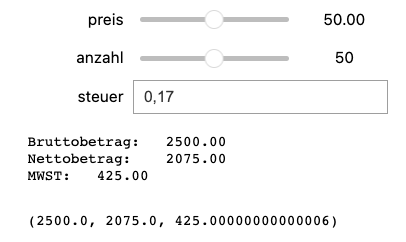

In [12]:
import ipywidgets as widgets
from IPython.display import display

def calculate_total_prices(price, quantity, tax_rate=0.17):
    net_total = price * quantity
    tax_amount = net_total * tax_rate
    gross_total = net_total + tax_amount
    return gross_total, net_total, tax_amount

price_slider = widgets.FloatSlider(
    value=50,
    min=0,
    max=100,
    step=0.05,
    description='Preis (€):',
    readout_format='.2f'
)

quantity_slider = widgets.IntSlider(
    value=1,
    min=1,
    max=100,
    step=1,
    description='Stückzahl:',
)

tax_rate_text = widgets.FloatText(
    value=0.17,
    description='MwSt-Satz:'
)

def on_value_change(change):
    price = price_slider.value
    quantity = quantity_slider.value
    tax_rate = tax_rate_text.value
    gross_total, net_total, tax_amount = calculate_total_prices(price, quantity, tax_rate)
    print(f"Stückzahl: {quantity}, Preis: {price:.2f} €, MwSt-Satz: {tax_rate:.2f}")
    print(f"Brutto-Gesamtpreis: {gross_total:.2f} €, Netto-Gesamtpreis: {net_total:.2f} €, Mehrwertsteuer: {tax_amount:.2f} €")

price_slider.observe(on_value_change, names='value')
quantity_slider.observe(on_value_change, names='value')
tax_rate_text.observe(on_value_change, names='value')

display(price_slider, quantity_slider, tax_rate_text)

FloatSlider(value=50.0, description='Preis (€):', step=0.05)

IntSlider(value=1, description='Stückzahl:', min=1)

FloatText(value=0.17, description='MwSt-Satz:')

Stückzahl: 3, Preis: 50.00 €, MwSt-Satz: 0.17
Brutto-Gesamtpreis: 175.50 €, Netto-Gesamtpreis: 150.00 €, Mehrwertsteuer: 25.50 €
Stückzahl: 4, Preis: 50.00 €, MwSt-Satz: 0.17
Brutto-Gesamtpreis: 234.00 €, Netto-Gesamtpreis: 200.00 €, Mehrwertsteuer: 34.00 €
Stückzahl: 6, Preis: 50.00 €, MwSt-Satz: 0.17
Brutto-Gesamtpreis: 351.00 €, Netto-Gesamtpreis: 300.00 €, Mehrwertsteuer: 51.00 €
Stückzahl: 7, Preis: 50.00 €, MwSt-Satz: 0.17
Brutto-Gesamtpreis: 409.50 €, Netto-Gesamtpreis: 350.00 €, Mehrwertsteuer: 59.50 €


**b)** Erstelle eine Funktion, welche ein Argument `promo` annimmt, welches entweder `True` oder `False` ist. Die Funktion soll sich von dem in Aufgabe 1 eingelesenen DataFrame nur die Zeilen raussuchen, in welchen die "Promo" Spalte mit der übergebenen Variable `promo` übereinstimmt. Von diesem Subset soll ein Scatterplot erstellt werden mit `"Customers"` auf der x-Achse und `"Sales"` auf der y-Achse. Fixiere die x-Achsen Limits bei (0, 2300) und die y-Achsen Limits bei (0, 18000).

Mache anschließend die  Funktion interaktiv, sodass man den Wert für `promo` in einer Dropdown Liste auswählen kann, und anschließend das Diagramm entsprechend aktualisiert wird. (10p)

2 Bonuspunkte: Wenn Promo `True` ist, sollen die Punkte rot sein. Wenn Promo `False` ist, sollen die Punkte blau sein.

Beispiel:

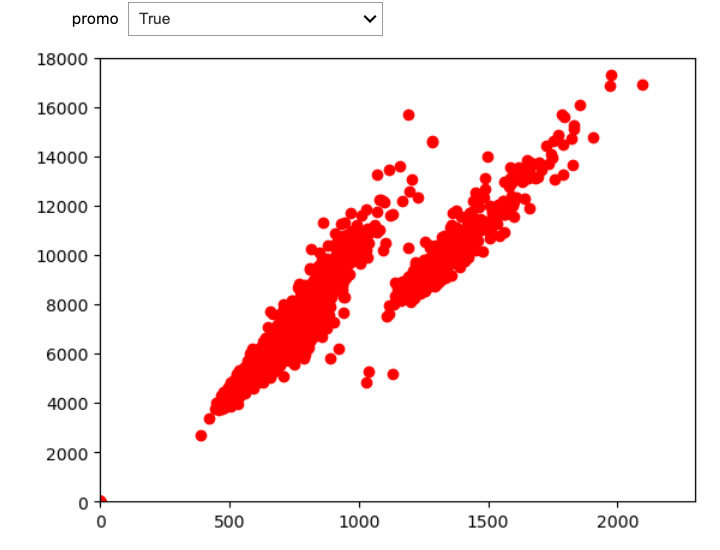

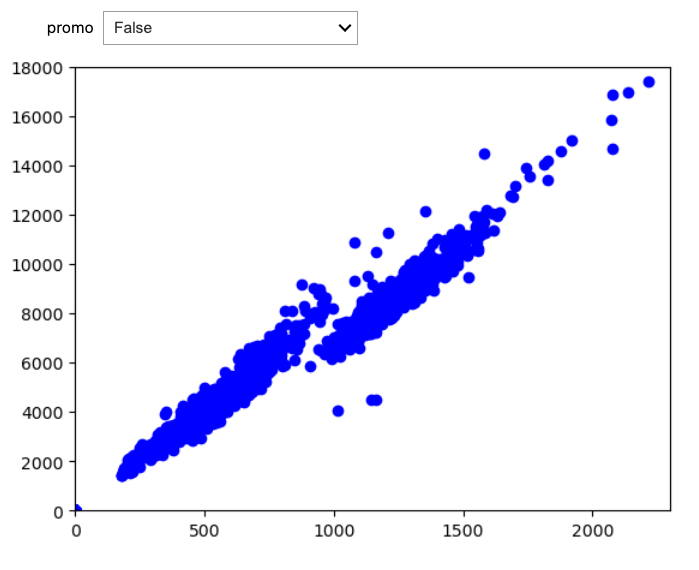

In [16]:
from ipywidgets import interactive
def plot_scatter(promo):
    subset = df[df["Promo"] == promo]
    plt.figure(figsize=(8, 6))
    plt.scatter(subset["Customers"], subset["Sales"])
    plt.xlabel("Customers")
    plt.ylabel("Sales")
    plt.title(f"Scatterplot for Promo={promo}")
    plt.xlim(0, 2300)
    plt.ylim(0, 18000)
    plt.grid(True)
    plt.show()

promo_dropdown = widgets.Dropdown(
    options=[True, False],
    description='Promo:',
    value=True,
)

interactive_plot = interactive(plot_scatter, promo=promo_dropdown)
display(interactive_plot)

interactive(children=(Dropdown(description='Promo:', options=(True, False), value=True), Output()), _dom_class…